In [12]:
import xarray as xr
from stompy.grid import unstructured_grid 
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
%matplotlib notebook

In [31]:
import six
six.moves.reload_module(unstructured_grid)

<module 'stompy.grid.unstructured_grid' from '/home/rusty/src/stompy/stompy/grid/unstructured_grid.py'>

In [32]:
ds=xr.open_dataset('snap3000.nc')
g=unstructured_grid.UnstructuredGrid.from_ugrid(ds)

In [4]:
ds.data_vars

Data variables:
    mesh       int64 ...
    node_x     (node) float64 5.809e+05 5.825e+05 ... 5.283e+05 5.293e+05
    node_y     (node) float64 4.151e+06 4.152e+06 ... 4.176e+06 4.176e+06
    face_node  (face, maxnode_per_face) int32 0 11345 358 -1 -1 ... -1 -1 -1 -1
    edge_node  (edge, node_per_edge) int32 5057 5058 5053 ... 50664 50705 50664
    time       datetime64[ns] ...
    mass       (face) float64 0.0 0.0 41.73 0.0 ... 969.6 1.212e+03 0.0
    step       int64 ...
    z_bed      (face) float64 -4.317 -2.722 -2.972 ... -34.78 -34.56 -33.97

In [33]:
D=g.smooth_matrix(f=0.5)

In [36]:
scal=ds.mass / g.cells_area()

# Diffusion matrix is creating some 2dx noise
for i in range(5):
    scal=D.dot(scal)

<IPython.core.display.Javascript object>


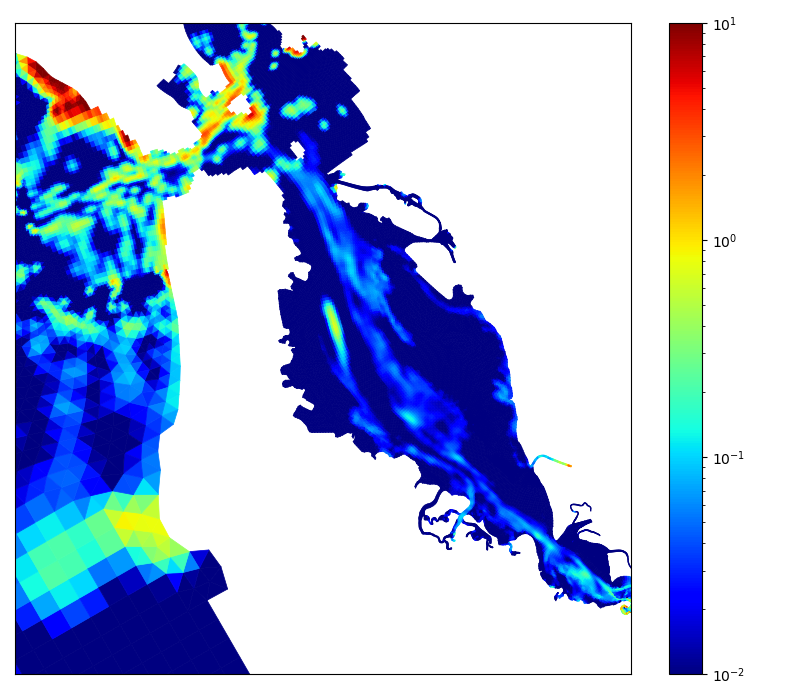

In [39]:
fig=plt.figure(figsize=(8,7))
ax=fig.add_subplot(1,1,1)



ccoll=g.plot_cells(values=scal.clip(0.01,np.inf),
                   norm=colors.LogNorm(),
                   ax=ax,cmap='jet')
ccoll.set_lw(0.5)
ccoll.set_edgecolor('face')
ccoll.set_clim([0.01,10])

plt.colorbar(ccoll)
ax.axis('equal')
ax.xaxis.set_visible(0)
ax.yaxis.set_visible(0)
fig.tight_layout()

In [26]:
scal.min()

0.0